In [58]:
# library to load the MNIST dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

In [59]:
print(X.shape)

(70000, 784)


In [60]:
# this makes it so only a subset of 10,000 instances is used
subset_size = 10000
X_subset, y_subset = X[:subset_size], y[:subset_size]

In [61]:
# split the subset into training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [62]:
#libraries neccessary
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# pipelines for linear SVM
linear_svm_pipeline = Pipeline([
    ('standardScaler', StandardScaler()),
    ('linear_svc',LinearSVC())
])
# train the linear SVM classifier
linear_svm_pipeline.fit(X_train, y_train)


C:\Users\ac389110\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardScaler', StandardScaler()),
                ('linear_svc', LinearSVC())])

In [63]:
# make predicitions using the linear SVM classifier
y_pred_linear = linear_svm_pipeline.predict(X_test)

In [64]:
# library for accuracy score
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the linear SVM classifier 
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear SVM accuracy:", accuracy_linear)

Linear SVM accuracy: 0.867


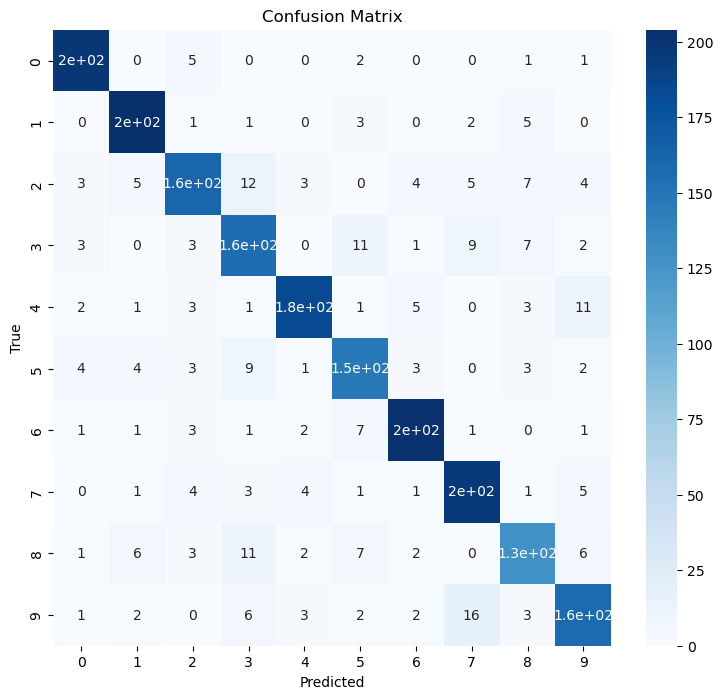

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_linear)

fig, ax = plt.subplots(figsize=(9, 8))
 #create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

#labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# pipeline for RBF kernel
rbf_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rbf_svc", SVC(kernel="rbf", random_state=42))
])

# train the RBF kernel SVM classifier
rbf_svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_svc', SVC(random_state=42))])

In [67]:
# make predicitons using the RBF kernel SVM classifiers
y_pred_rbf = rbf_svm_pipeline.predict(X_test)

In [68]:
# Calculate the accuracy of the RBf kernel SVM classifier
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF kernel SVM accuracy:", accuracy_rbf)

RBF kernel SVM accuracy: 0.938


In [69]:
confusion_matrix(y_test, y_pred_rbf)

array([[205,   0,   1,   0,   0,   0,   1,   0,   0,   0],
       [  0, 210,   4,   0,   0,   1,   0,   0,   1,   0],
       [  3,   0, 194,   2,   1,   0,   1,   1,   1,   1],
       [  1,   2,   5, 176,   0,   2,   0,   5,   1,   0],
       [  0,   0,   4,   0, 198,   2,   1,   1,   0,   5],
       [  3,   3,   3,   7,   0, 154,   3,   1,   2,   0],
       [  3,   0,   7,   0,   0,   5, 204,   0,   1,   0],
       [  0,   2,   1,   1,   3,   0,   0, 206,   0,   3],
       [  0,   1,   2,   2,   1,   3,   0,   1, 154,   2],
       [  1,   1,   3,   5,   0,   0,   0,   6,   1, 175]], dtype=int64)